# Credit Card detection

In [201]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import f1_score


In [276]:
data=pd.read_csv("./fraudTrain.csv")
train=pd.read_csv("./fraudTrain.csv")
test=pd.read_csv("./fraudTest.csv")

# Data Loading and Exploration

In [3]:
pd.set_option("display.max_columns", 50)
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train.shape

(1296675, 23)

In [5]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Cleaning data

In [7]:
train.duplicated().sum()

0

In [8]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
train.drop(["Unnamed: 0"],inplace=True,axis=1)#Unnamed: 0 represent the index of dataframe

In [10]:
pd.set_option("display.max_columns", 50)
train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [11]:
train.cc_num.value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

In [12]:
train.query("is_fraud==0 and cc_num==571365235126")

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
85,2019-01-01 01:02:53,571365235126,fraud_VonRueden Group,grocery_net,89.35,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,bce01a6ae8b8c6227cd4f1de751c017c,1325379773,44.630758,-87.123894,0
1045,2019-01-01 13:04:25,571365235126,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,177.82,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,26e9b361f78724f145faedaaad9da0c3,1325423065,45.105736,-87.086468,0
1456,2019-01-01 16:03:12,571365235126,fraud_Hills-Witting,shopping_net,3.89,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,9c7f4171fce7111db34eb60f56d74b9b,1325433792,45.447156,-87.018988,0
1635,2019-01-01 17:32:13,571365235126,"fraud_Cronin, Kshlerin and Weber",health_fitness,53.32,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,1f58f90aa5eb9c06f066da77aaea5821,1325439133,44.367747,-85.586295,0
2163,2019-01-01 21:50:57,571365235126,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,1.03,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,b380b0a10b77b658ed90c3bdc51278f9,1325454657,45.106034,-86.367238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294258,2020-06-20 15:28:06,571365235126,fraud_Waelchi-Wolf,kids_pets,58.20,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,eec4372729f34df85ce1ab8aeff15dbd,1371742086,45.445814,-87.143945,0
1294329,2020-06-20 16:01:42,571365235126,"fraud_Willms, Kris and Bergnaum",shopping_pos,48.53,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,54066ea4b762017fc1bf65d202abc79f,1371744102,44.410309,-85.690461,0
1294415,2020-06-20 16:43:15,571365235126,fraud_Rau-Robel,kids_pets,16.79,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,8ae9c9391fc9db32ed39fb5ecf70a796,1371746595,45.378418,-85.272891,0
1294979,2020-06-20 21:30:34,571365235126,fraud_Jerde-Hermann,travel,3.10,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,975da6f4c3164a576665e3bb974b91e9,1371763834,44.141079,-86.353260,0


In [13]:
train.query("is_fraud==1 and cc_num==571365235126")

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
373260,2019-06-22 00:23:44,571365235126,"fraud_Towne, Greenholt and Koepp",shopping_net,875.26,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,a50ff7deae9228990a7fddad2ae01040,1340324624,44.842307,-85.385081,1
375347,2019-06-22 17:03:53,571365235126,"fraud_Walter, Hettinger and Kessler",personal_care,22.37,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,1fe7977b23456398e978b1315f85276c,1340384633,43.711829,-85.885218,1
376280,2019-06-22 22:47:12,571365235126,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,995.42,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,0dfb1de99e5aaf56a43763094bd0a049,1340405232,44.535693,-87.106018,1
376348,2019-06-22 23:07:48,571365235126,fraud_Ratke and Sons,health_fitness,20.52,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,cc0d00ce752b90405fe40a01b1d7e3f4,1340406468,45.183098,-86.925269,1
376359,2019-06-22 23:12:15,571365235126,fraud_Kuhn LLC,shopping_pos,902.67,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,9344f63ea38b9c8e7808d5952c45f2bb,1340406735,44.196943,-86.293135,1
376479,2019-06-22 23:45:39,571365235126,fraud_Kovacek Ltd,travel,9.22,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,553facf8fb79ea2785c9637fd94d9b41,1340408739,45.037414,-85.705446,1
376782,2019-06-23 02:13:00,571365235126,"fraud_Turner, Ruecker and Parisian",misc_pos,671.97,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,eff86bfd14607593134d53f62730c958,1340417580,44.761219,-85.253318,1
380005,2019-06-23 22:01:32,571365235126,fraud_Botsford Ltd,shopping_pos,658.74,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,f2675ba66e9efb85d76c3563a7139152,1340488892,44.559262,-87.061550,1
380288,2019-06-23 23:15:18,571365235126,fraud_Kozey-McDermott,travel,10.91,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,d230afb66a672371b88594d7ae0e6578,1340493318,45.468849,-86.506437,1
380352,2019-06-23 23:31:57,571365235126,"fraud_Yost, Schamberger and Windler",kids_pets,19.03,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,MI,49628,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,9c75a6c6d63319cd01a65bbbb91458f0,1340494317,44.252149,-85.249388,1


In [14]:
train.drop(["cc_num","first","last","trans_num","unix_time"],axis=1,inplace=True)

# Data visualization

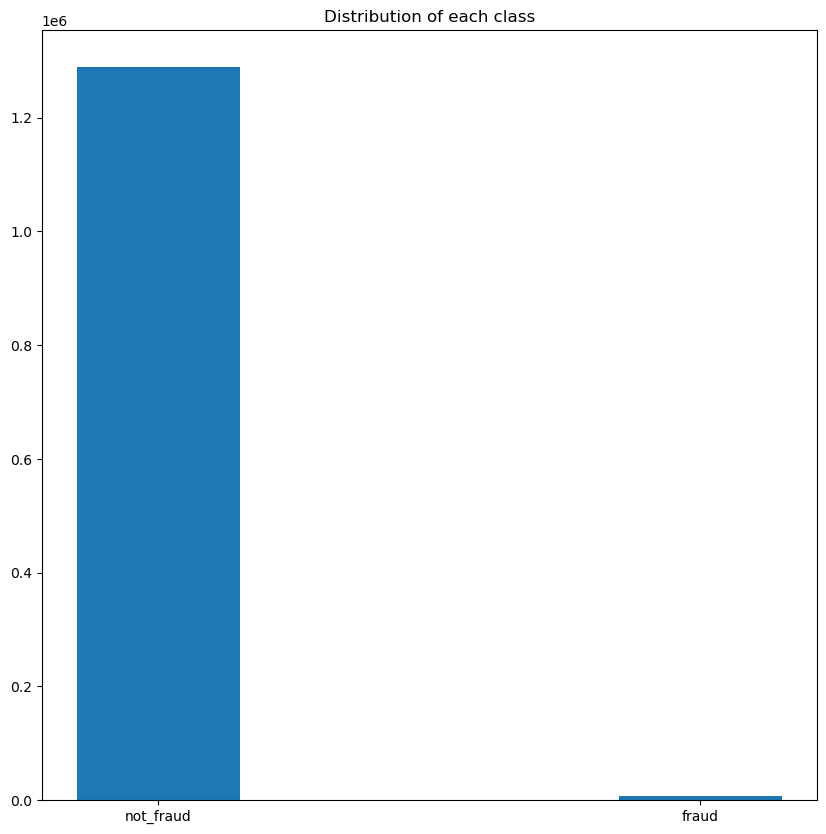

In [15]:
plt.figure(figsize=(10,10))
plt.bar(["not_fraud","fraud"],train.is_fraud.value_counts(),width=.3)
plt.title("Distribution of each class")
plt.show()

In [16]:
train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# 1-category

In [17]:
train

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0


In [18]:
train.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

Text(0, 0.5, 'distribution')

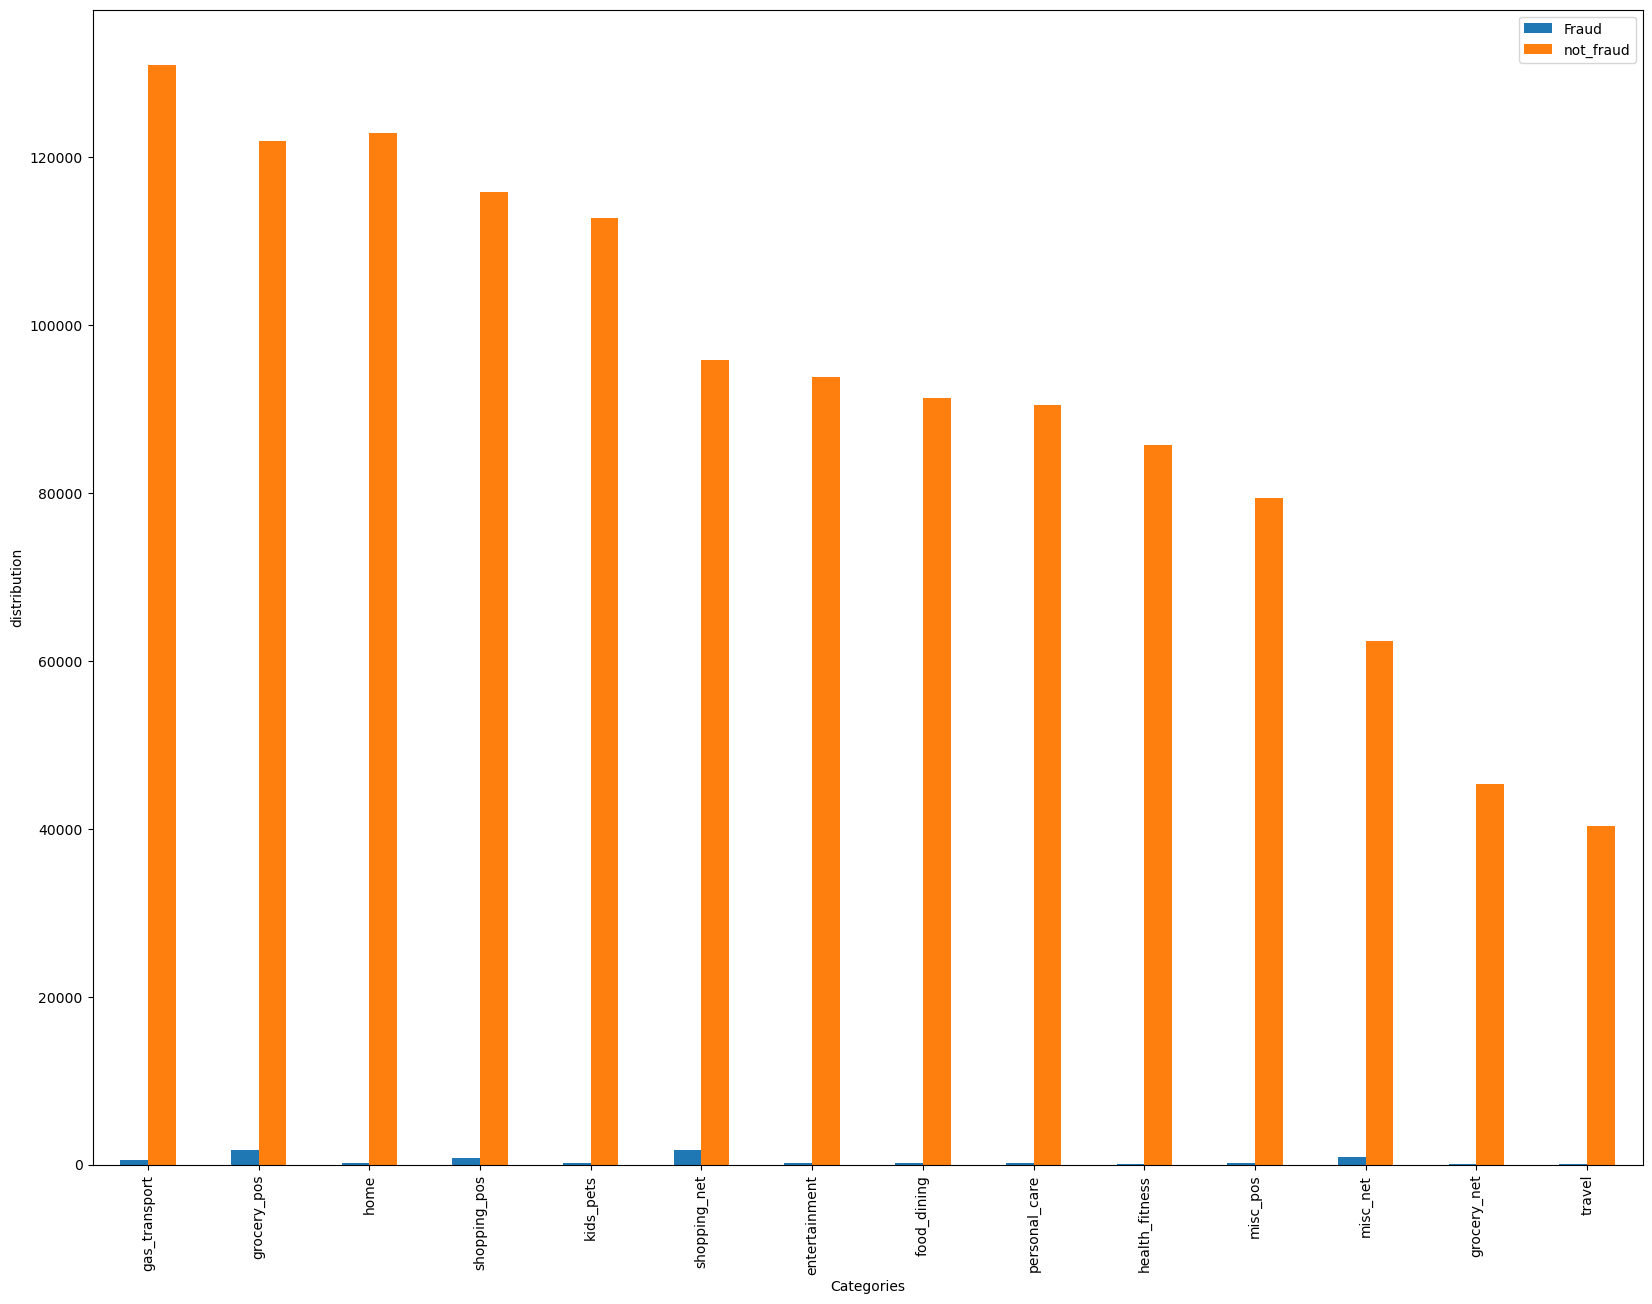

In [19]:
x=train.category.value_counts().index
y=train.query("is_fraud==1")["category"].value_counts()
y=[y[i] for i in x]
y_1=train.query("is_fraud==0")["category"].value_counts()
y_1=[y_1[i] for i in x]

plot_data=pd.DataFrame({
    "Fraud":y,
    "not_fraud":y_1},
    index=x)
plot_data.plot(kind="bar",figsize=(20, 15))
plt.xlabel("Categories")
plt.ylabel("distribution")



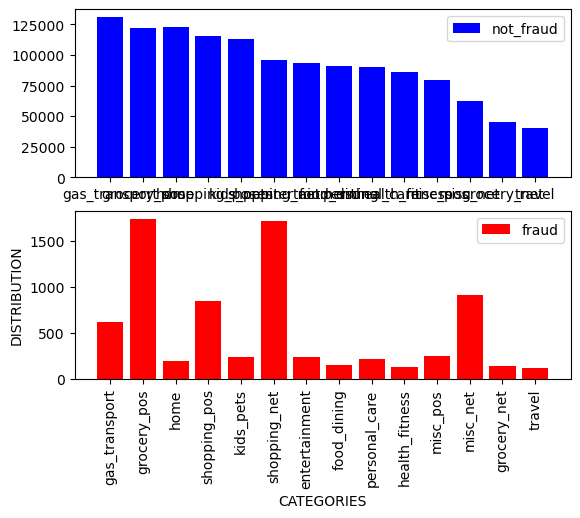

In [20]:
plt.subplot(211)
plt.bar(x,y_1, width=0.8,color='b',label="not_fraud")
plt.legend()
plt.subplot(212)
plt.bar(x,y, width=0.8,label="fraud",color='r')

plt.xlabel("CATEGORIES")
plt.ylabel("DISTRIBUTION")
plt.xticks(rotation=90)
plt.legend()
plt.show()


# 2-amt

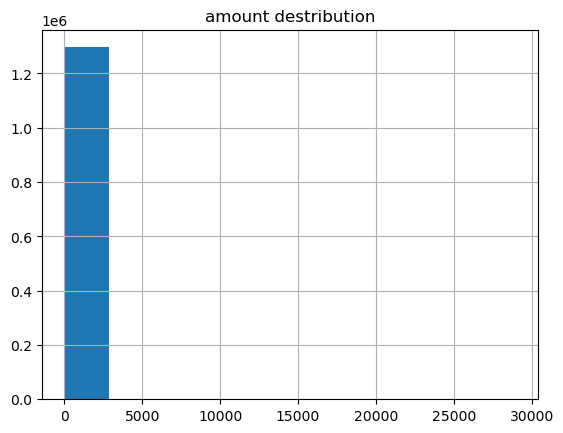

In [21]:
train.amt.hist()
plt.title("amount destribution")
plt.show()

In [22]:
train.amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [23]:
train.query("is_fraud==0").amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [24]:
train.query("is_fraud==1").amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

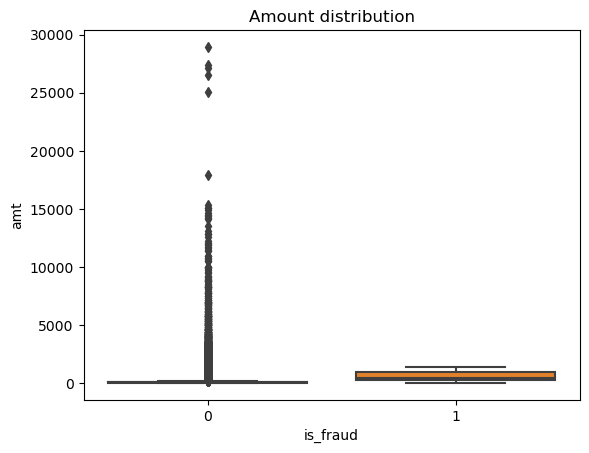

In [25]:
sns.boxplot(data=train, x="is_fraud", y="amt")
plt.title("Amount distribution")
plt.show()


# 3-city_pop Analysis

In [26]:
train.query("is_fraud==0").city_pop.describe()

count    1.289169e+06
mean     8.877523e+04
std      3.018065e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

In [27]:
train.query("is_fraud==1").city_pop.describe()

count    7.506000e+03
mean     9.727676e+04
std      3.265815e+05
min      2.300000e+01
25%      7.465000e+02
50%      2.623000e+03
75%      2.143700e+04
max      2.906700e+06
Name: city_pop, dtype: float64

<Axes: >

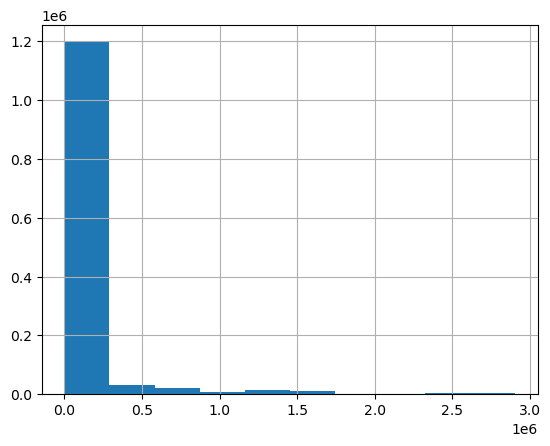

In [28]:
train.query("is_fraud==0").city_pop.hist()

<Axes: >

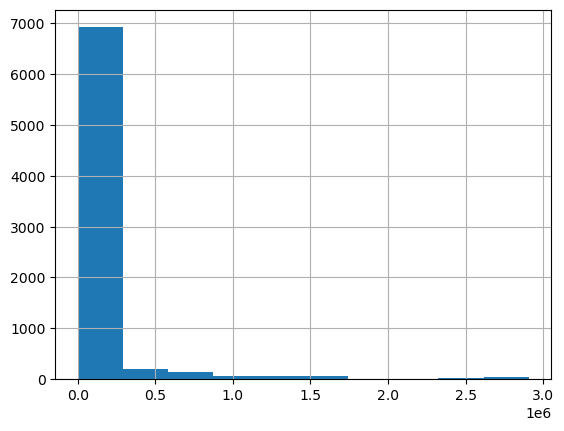

In [29]:
train.query("is_fraud==1").city_pop.hist()

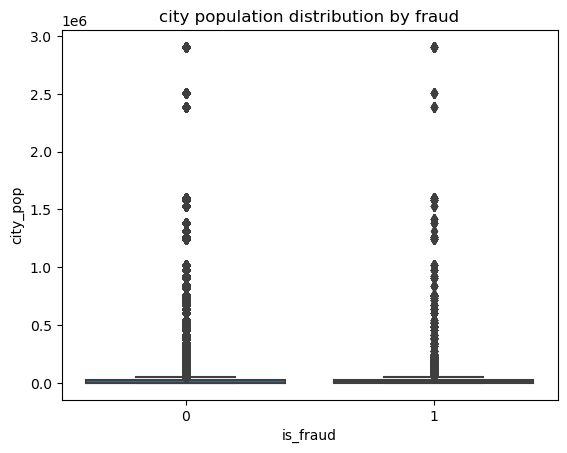

In [30]:
sns.boxplot(data=train, x="is_fraud", y="city_pop")
plt.title("city population distribution by fraud")
plt.show()

# 3-city

In [31]:
train.query("is_fraud==1").city.value_counts()

Houston           39
Warren            33
Huntsville        29
Naples            29
Dallas            27
                  ..
Florence           3
Kilgore            2
Phoenix            2
Phenix City        2
Denham Springs     2
Name: city, Length: 702, dtype: int64

In [32]:
train.query("is_fraud==0").city.value_counts()

Birmingham     5606
San Antonio    5105
Utica          5080
Phoenix        5073
Meridian       5047
               ... 
Lithopolis      472
De Lancey       472
West Finley     471
Humboldt        470
Stittville      469
Name: city, Length: 836, dtype: int64

In [33]:
train.zip.value_counts()


73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: zip, Length: 970, dtype: int64

In [34]:
train.street.value_counts()

0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: street, Length: 983, dtype: int64

In [35]:
train.city.value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

In [36]:
train.city_pop.value_counts()

606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: city_pop, Length: 879, dtype: int64

# 4-Age and gender analysis

In [37]:
# determine the age of each custmor
yob=train["dob"].str.extract("(\d+)").astype("Int64")
current_d=train["trans_date_trans_time"].str.extract("(\d+)").astype("Int64")
train["currunt_age"]=current_d-yob


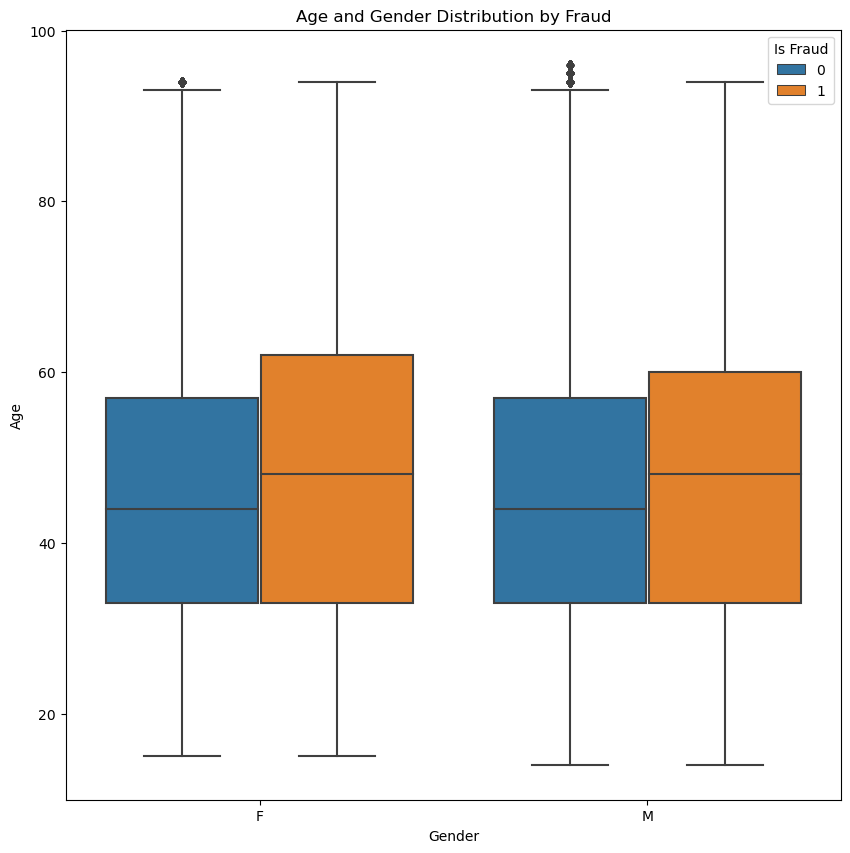

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x='gender', y='currunt_age', hue='is_fraud', data=train)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

# 5-geographical analysis

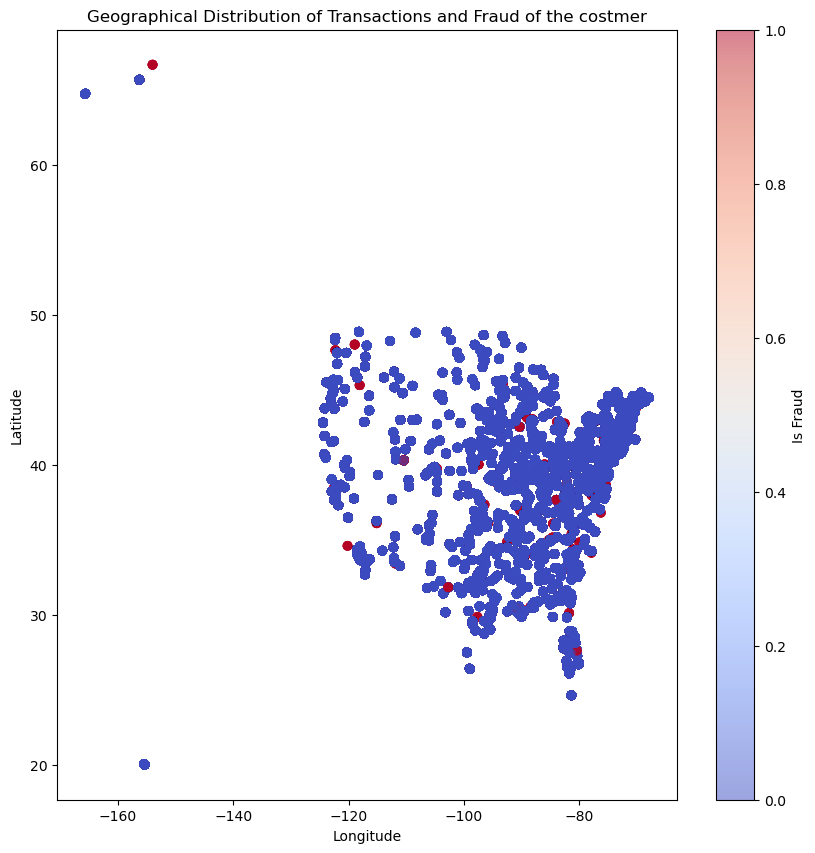

In [39]:
# Scatter plot of the latitude and longitude of the costmer
plt.figure(figsize=(10, 10))
plt.scatter(train['long'], train['lat'], c=train['is_fraud'], cmap=matplotlib.cm.coolwarm, alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud of the costmer')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

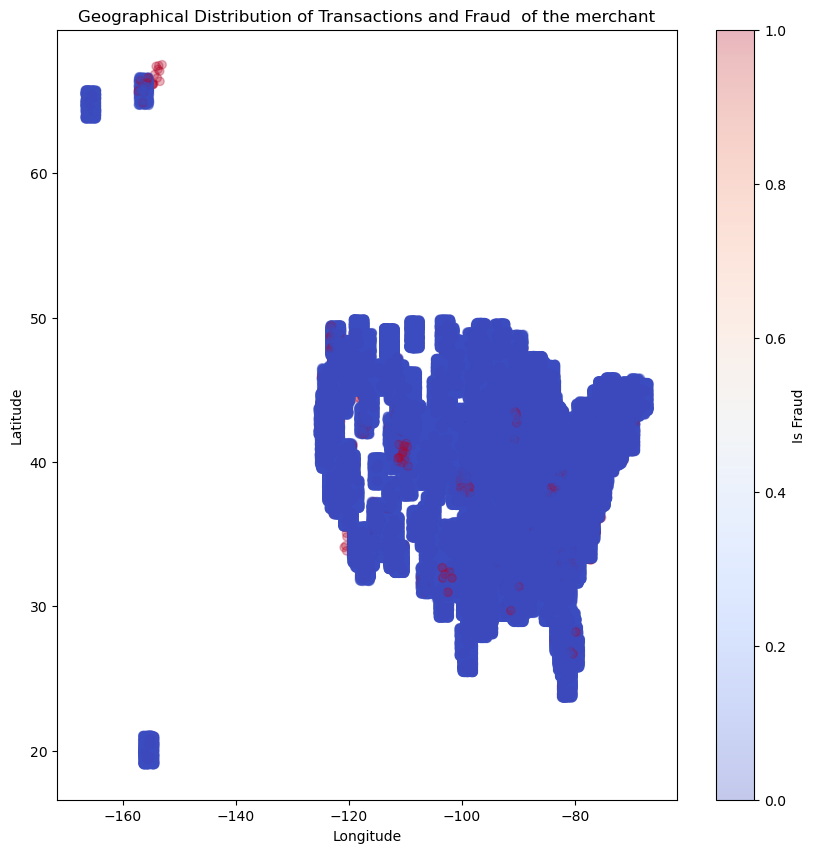

In [40]:
# Scatter plot of the latitude and longitude of the merchant
plt.figure(figsize=(10, 10))
plt.scatter(train['merch_long'], train['merch_lat'], c=train['is_fraud'], cmap=matplotlib.cm.coolwarm, alpha=0.3)
plt.title('Geographical Distribution of Transactions and Fraud  of the merchant')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

In [41]:
# calculate the euclidean distance
position_C=np.array([[i,j] for i, j in zip(train["long"].values,train["lat"].values)])
position_m=np.array([[i,j] for i, j in zip(train["merch_long"].values,train["merch_lat"].values)])
dist = [np.linalg.norm(x - y) for x ,y in zip(position_C,position_m)]
train["position"]=dist


{'whiskers': [<matplotlib.lines.Line2D at 0x20d1de610c0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d1de63070>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d0fadb5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x20d1de62680>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d1dca68f0>,
 'means': []}

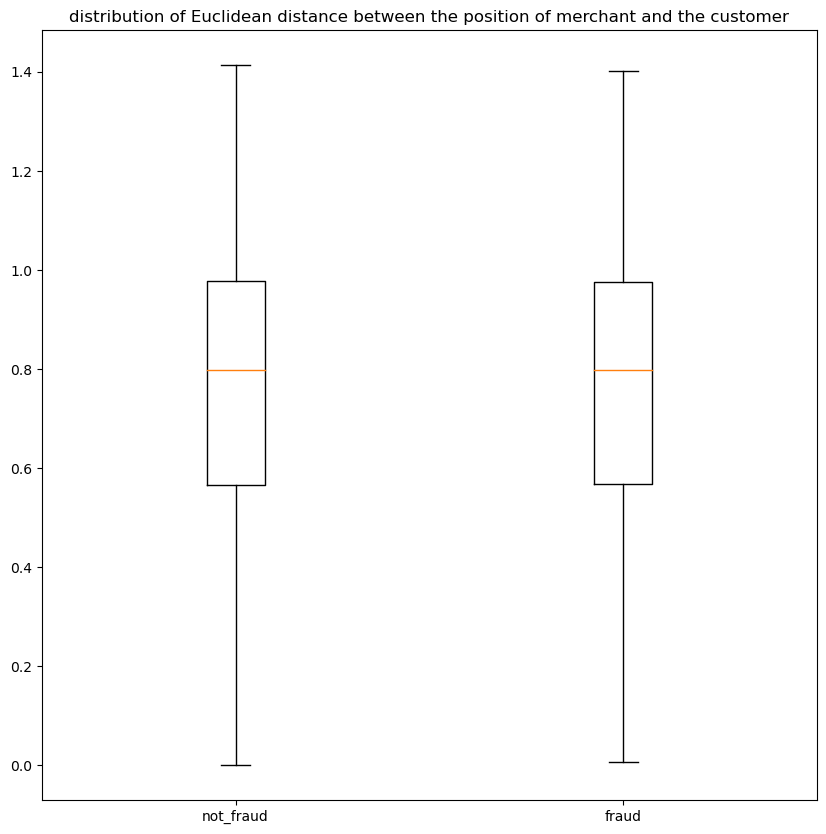

In [42]:
plt.figure(figsize=(10,10))
plt.title("distribution of Euclidean distance between the position of merchant and the customer")
plt.boxplot([train.query("is_fraud==0").position,train.query("is_fraud==1").position],labels=["not_fraud","fraud"],showbox=True)


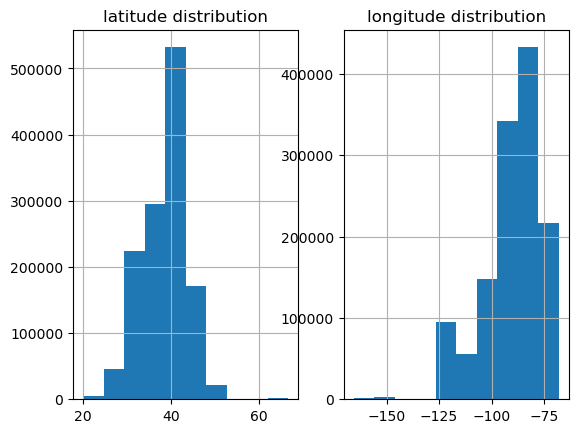

In [43]:
plt.subplot(121)
train.lat.hist()
plt.title("latitude distribution")
plt.subplot(122)
train.long.hist()
plt.title("longitude distribution")
plt.show()

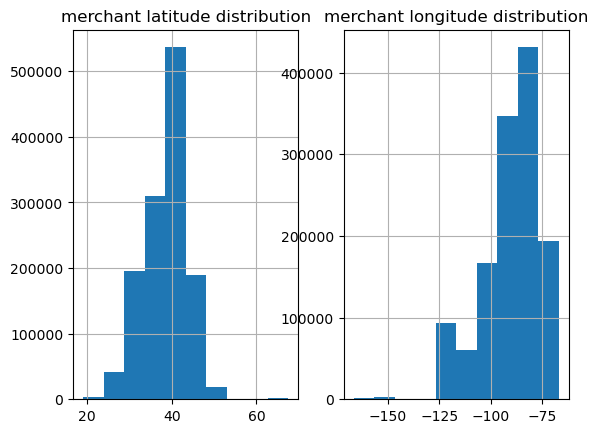

In [44]:
plt.subplot(121)
train.merch_lat.hist()
plt.title("merchant latitude distribution")
plt.subplot(122)
train.merch_long.hist()
plt.title("merchant longitude distribution")
plt.show()

# Time analysis: Extract hours and days from 'trans_date_trans_time'

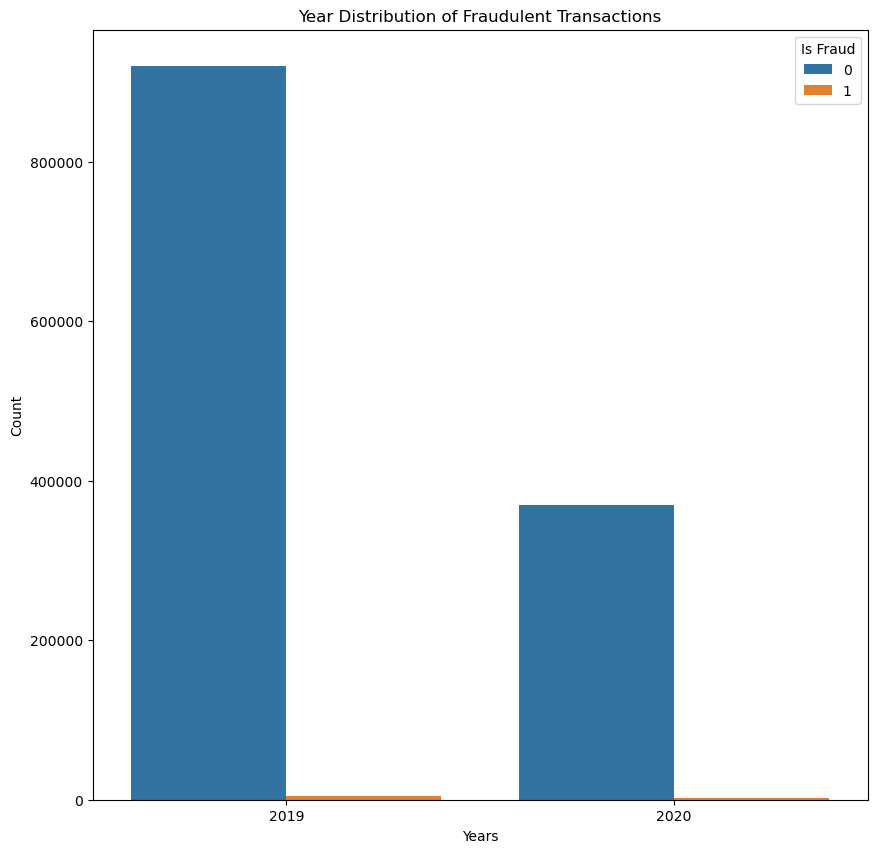

In [45]:
# Plot year distribution of fraud
train["year"]=pd.to_datetime(train['trans_date_trans_time']).dt.year
train["day"]=pd.to_datetime(train['trans_date_trans_time']).dt.day
train["hour"]=pd.to_datetime(train['trans_date_trans_time']).dt.hour
train["month"]=pd.to_datetime(train['trans_date_trans_time']).dt.month
plt.figure(figsize=(10, 10))
sns.countplot(x='year', hue='is_fraud', data=train)
plt.title('Year Distribution of Fraudulent Transactions')
plt.xlabel('Years')
plt.ylabel('Count')
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

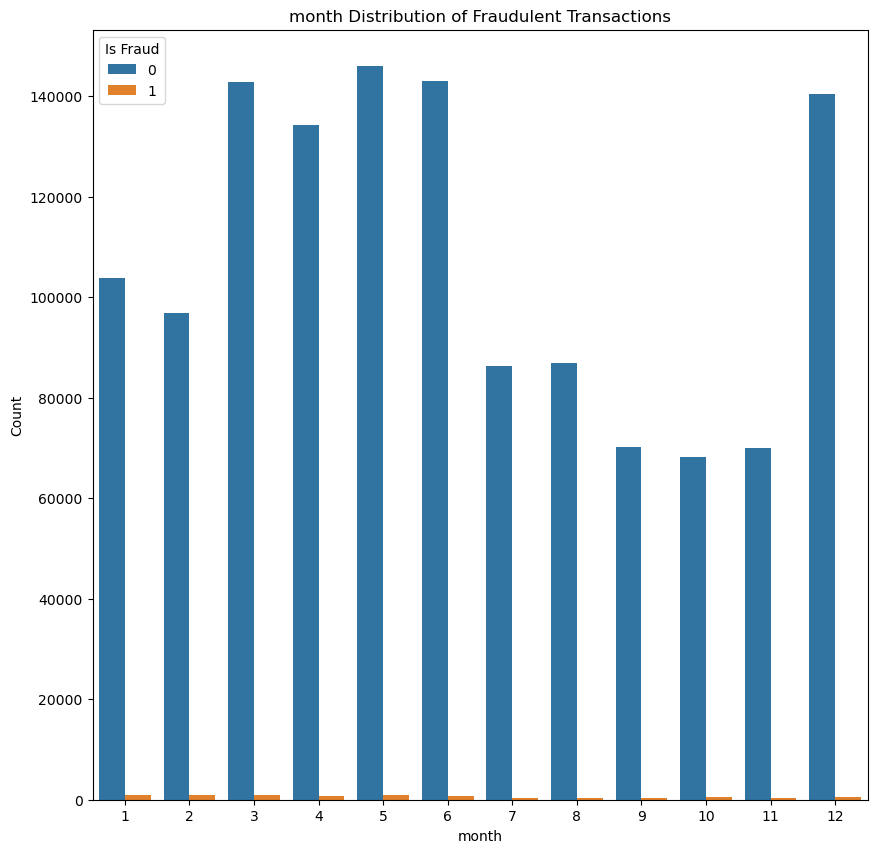

In [46]:
# Plot month distribution of fraud
plt.figure(figsize=(10, 10))
sns.countplot(x='month', hue='is_fraud', data=train)
plt.title('month Distribution of Fraudulent Transactions')
plt.xlabel('month')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

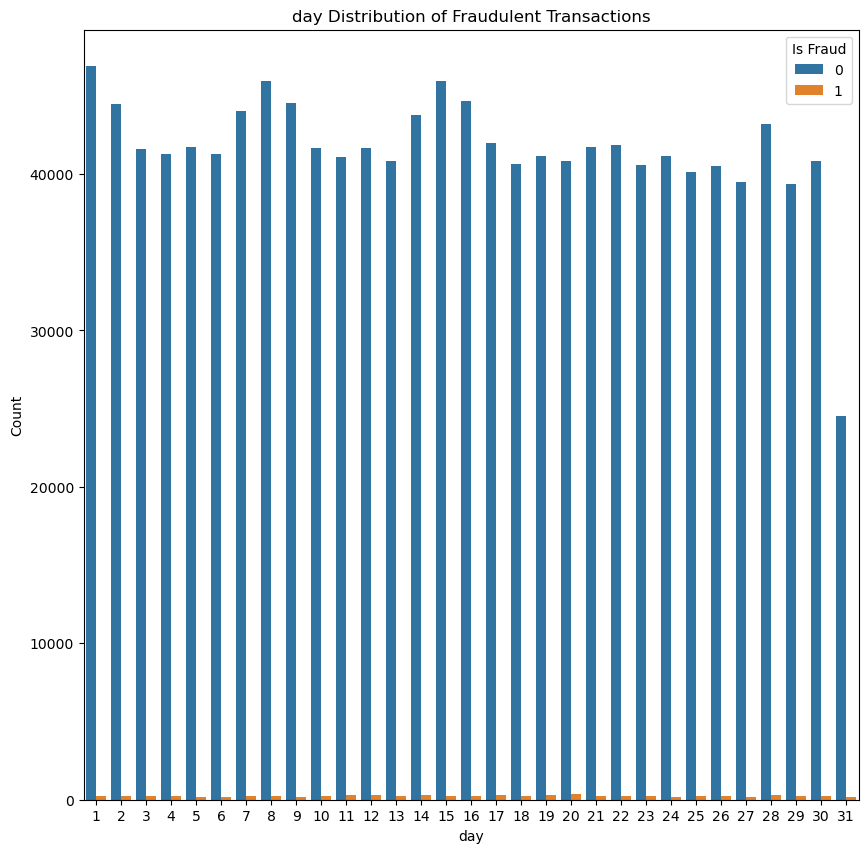

In [47]:
# Plot day distribution of fraud
plt.figure(figsize=(10, 10))
sns.countplot(x='day', hue='is_fraud', data=train)
plt.title('day Distribution of Fraudulent Transactions')
plt.xlabel('day')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

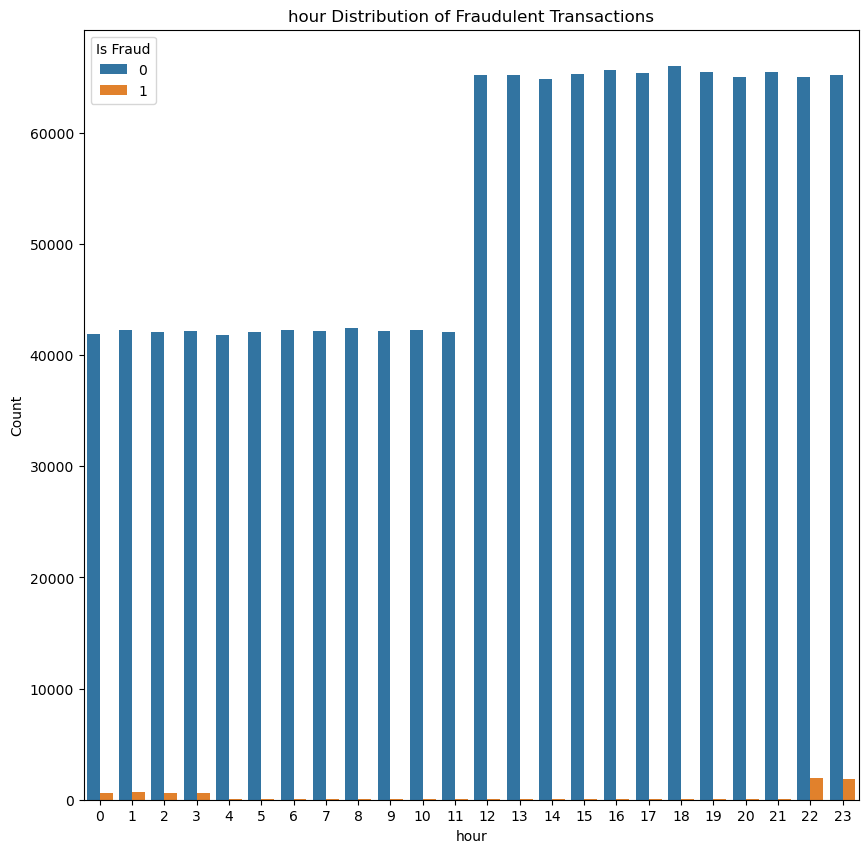

In [48]:
# Plot hour distribution of fraud
plt.figure(figsize=(10, 10))
sns.countplot(x='hour', hue='is_fraud', data=train)
plt.title('hour Distribution of Fraudulent Transactions')
plt.xlabel('hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

# Job Analysis

In [49]:
# list of job
train["job"].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

# feature Engineering

In [50]:
city=train.city.values
state=train.state.values
c_zip=train.zip.values
street=train.street.values

In [51]:
concat=[f'{i} {j} {str(k)} {l}' for i,j,k,l in zip(state,city,c_zip,street)]
train["location"]=concat
train.location.value_counts()

MI Elberta 49628 0069 Robin Brooks Apt. 695               3123
PA Uledi 15484 864 Reynolds Plains                        3123
AZ Superior 85173 8172 Robertson Parkways Suite 072       3119
SC Bradley 29819 4664 Sanchez Common Suite 930            3117
MS Moorhead 38761 8030 Beck Motorway                      3113
                                                          ... 
IL Streator 61364 7281 Joshua Mills Apt. 077                 7
MS Bruce 38915 3307 Ferguson Way                             7
NY New York City 10018 9599 Washington Field Suite 238       7
VA Norfolk 23523 3437 Ross Flat Apt. 592                     7
TX San Antonio 78208 27954 Hall Mill Suite 575               7
Name: location, Length: 983, dtype: int64

In [52]:
train

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,currunt_age,position,year,day,hour,month,location
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,31,0.872830,2019,1,0,1,NC Moravian Falls 28654 561 Perry Cove
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,41,0.272310,2019,1,0,1,WA Orient 99160 43039 Riley Greens Suite 393
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,57,0.975845,2019,1,0,1,ID Malad City 83252 594 White Dale Suite 530
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,52,0.919802,2019,1,0,1,MT Boulder 59632 9443 Cynthia Court Apt. 038
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,33,0.868505,2019,1,0,1,VA Doe Hill 24433 408 Bradley Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,59,1.177732,2020,21,12,6,UT Hatch 84735 162 Jessica Row Apt. 072
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,41,0.819632,2020,21,12,6,MD Tuscarora 21790 8617 Holmes Terrace Suite 651
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,53,0.967541,2020,21,12,6,NM High Rolls Mountain Park 88325 1632 Cohen D...
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,40,0.898775,2020,21,12,6,SD Manderson 57756 42933 Ryan Underpass


transformation that should be executed to numerical features 
-trans_date_trans_time 'extracting years,month,day,hours'
-amt 'Standardization' (scaling)
-dob  'extracting the age'
-lat 'Standardization' (scaling)
-long  'Standardization' (scaling)
-lat_merch 'Standardization' (scaling)
-long merch 'Standardization' (scaling)

In [53]:
# Standardization
noramlization=StandardScaler(with_mean=0,with_std=1)
# EXTRACTING THE AGE
def Age(array_a,array_d):
    date_b=pd.to_datetime(array_a).dt.year
    data_c=pd.to_datetime(array_d).dt.year
    liste=data_c-date_b
    return liste
# extracting year
def year(array):
    return pd.to_datetime(array).dt.year
def month(array):
    return pd.to_datetime(array).dt.month
def day(array):
    return pd.to_datetime(array).dt.day
def hour(array):
    return pd.to_datetime(array).dt.hour

In [54]:
# concatenation of the features city,state,zip,street
def concat(state,city,zipc,street):
    liste=[f'{i} {j} {str(k)} {l}' for i,j,k,l in zip(state,city,zipc,street)]
    arr=LabelEncoder().fit_transform(liste)
#     arr=StandardScaler().fit_transform(arr.reshape(1, -1))
    return arr


In [66]:
# frequency Encoding location varible
def encod(state,city,zipc,street):
    liste=concat(state,city,zipc,street)
    data = pd.DataFrame({'Category':liste})
    # Calculate the frequency of each category
    
    frequency_map = data.groupby("Category").size()/len(data["Category"])
    liste1=[]
    for loc in data["Category"]:
        if loc in frequency_map.index:
            liste1.append(frequency_map[loc])
        else:
            liste1.append(0)
    
    return np.array(liste1)


In [63]:
def encod_job(data):
    
    data = pd.DataFrame({'Category':data})
    # Calculate the frequency of each category
    
    frequency_map = data.groupby("Category").size()/len(data["Category"])
    liste=[]
    for job in data["Category"]:
        if job in frequency_map.index:
            liste.append(frequency_map[job])
        else:
            liste.append(0)
    
    return np.array(liste)

In [65]:
encod_job(data["job"]).shape

(1296675,)

In [237]:
def transformation(data):
    Mth=month(data["trans_date_trans_time"])
    D=day(data["trans_date_trans_time"])
    H=hour(data["trans_date_trans_time"])
    cat=LabelEncoder().fit_transform(data["category"])
    Gender=LabelEncoder().fit_transform(data["gender"])
    location=encod(data["state"],data["city"],data["zip"],data["street"])
    amount=StandardScaler().fit_transform(data[["amt"]]).reshape(1296675)
    job=encod_job(data["job"])
    age=Age(data["dob"],data["trans_date_trans_time"])
    dataframe=pd.DataFrame({"D":D,"Mth":Mth,"H":H,"cat":cat,"Gender":Gender,"amount":amount,"age":age,"is_fraud":data["is_fraud"]})

    #     dataframe=pd.DataFrame({"Y":Y,"Mth":Mth,"D":D,"H":H,"cat":cat,"Gender":Gender,"location":location,"amount":amount,"job":job,"age":age,"is_fraud":data["is_fraud"]})
    return dataframe

In [238]:
D=transformation(data)

In [239]:
D=pd.concat([D.query("is_fraud==1"),D.query("is_fraud==0")[:7506]], ignore_index=True)
D=shuffle(D)
D

,D,Mth,H,cat,Gender,amount,age,is_fraud
6178,19,3,1,4,1,1.668760,56,1
13998,5,1,6,0,0,-0.337964,52,0
5150,29,12,22,9,1,-0.384497,46,1
4271,2,11,2,12,0,4.342979,49,1
128,12,1,7,4,1,1.454808,48,1
...,...,...,...,...,...,...,...,...
12631,4,1,8,2,1,-0.133056,43,0
11452,3,1,10,0,0,0.858299,83,0
1220,13,3,23,11,1,6.409897,57,1
13434,4,1,20,6,1,0.519904,95,0


# Choosing model

In [280]:
RNN=MLPClassifier(hidden_layer_sizes=(200),activation="relu",learning_rate_init=.2,max_iter=500,alpha=.7)
RNN.fit(D.drop("is_fraud",axis=1),D["is_fraud"])

MLPClassifier(alpha=0.7, hidden_layer_sizes=200, learning_rate_init=0.2,
              max_iter=500)

In [281]:
pre=RNN.predict((D.drop("is_fraud",axis=1)))

In [282]:
confusion_matrix(D["is_fraud"],pre)

array([[7469,   37],
       [ 146, 7360]], dtype=int64)

In [283]:
cross_val_score(RNN,D.drop("is_fraud",axis=1),D["is_fraud"],cv=3,scoring="f1")

array([0.98711236, 0.98809284, 0.92594665])